The output of this code plots Radial velocity curve and Star orbit for Sirius Binary Star system. The expression for velocity, radial distance and length of semimajor axis has been taken from the following website https://en.wikipedia.org/wiki/Elliptic_orbit . Data for Sirius binary star system has been taken from https://en.wikipedia.org/wiki/Sirius .

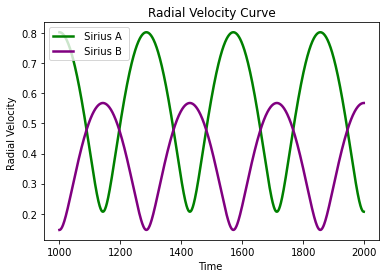

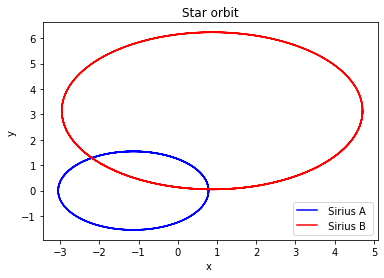

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def RV(m1,m2,e,P,i,n,k):
    
    theta = np.linspace(0,n*np.pi,num=1000) + k     # k is phase difference in the velocity of both stars
    
    a = ((m1 + m2)*(P**2) / (4*(np.pi)**2))**(1/3)  # semi major axis
    
    r = (a*(1 - e**2)/(1 + e*np.cos(theta)))  # radial distance
    
    z = ((2/r) - (1/a))
    v = np.sqrt((z*m1))*np.sin(i)   # radial velocity

    a_s = ((m2)/(m1+m2))*a         # semi major axis of individual star orbit
    r_s = (a_s*(1 - e**2)/(1 + e*np.cos(theta)))
    
    x = r_s*np.cos(theta)       # coordinates for the orbit
    y = r_s*np.sin(theta)
    
    return v,x,y
 
m_a = 2 # mass of Sirius A in terms of Solar masses

m_b = 1 # mass of Sirius A in terms of Solar masses

P = 50     # time period of revolution

e = 0.591 # eccentricity of orbit

i = np.radians(136.336)     # angle of inclination

n = 7 # total number of half revolutions 

s = 0
k = np.pi


v1,x1,y1 = RV(m_a,m_b,e,P,i,n,s)
v2,x2,y2 = RV(m_b,m_a,e,P,i,n,k)
y2 = y2 + k #adding phase difference term to the coordinates
x2 = x2 + k 

ti = 1000
tf = 2000     
t = np.arange(ti,tf,1)  # time range for plotting

plt.plot(t, v1,color = 'green', label = " Sirius A ", linewidth = 2.5)
plt.plot(t, v2, color = 'purple', label = " Sirius B ", linewidth = 2.5)
plt.title('Radial Velocity Curve')
plt.ylabel("Radial Velocity ")
plt.xlabel("Time ")
plt.legend()
plt.show()

plt.plot(x1, y1,color = 'blue', label = " Sirius A ")
plt.plot(x2, y2, color = 'red', label = " Sirius B ")
plt.title('Star orbit')
plt.ylabel("y ")
plt.xlabel("x ")
plt.legend()
plt.show()